In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MaxNLocator
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

import sys
import pandas as pd
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import requests
from CTkMessagebox import CTkMessagebox
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge, Lasso

from PIL import Image, ImageTk
from io import BytesIO
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import sys
import pandas as pd
import os
import requests
from CTkMessagebox import CTkMessagebox
from sklearn.linear_model import Ridge
from PIL import Image, ImageTk
from io import BytesIO
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Calculate the different metrics imports
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Library

In [128]:
api_key = "f182ce56"

class PerformanceTest:
    def __init__(self, X, Y, apply_pca=False, n_components=None):
        """
        Initialize the performance test with input features (X) and target labels (Y).
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        
        if apply_pca:
            pca = PCA(n_components=n_components)
            self.X_train = pca.fit_transform(self.X_train)
            self.X_test = pca.transform(self.X_test)
            print(f"Applied PCA with {n_components} components. Reduced features: {self.X_train.shape[1]}")

        self.model_results = {}
        self.maximum_k = min(max(2, len(self.X_train) // 5), len(self.X_train) - 1)  # Ensure max_k is within range

        # Base hypotheses
        self.hypotheses = {
            "Ridge Regression": Ridge(alpha=1.0),
            "Lasso Regression": Lasso(alpha=0.1)
        }

        # KNN models
        knn_models = {f"KNN (k={k})": KNeighborsRegressor(n_neighbors=k) for k in range(2, self.maximum_k + 1)}
        self.hypotheses.update(knn_models)

        # RandomForest Regressor Variations
        rf_variations = {f"RandomForest (trees={n})": RandomForestRegressor(n_estimators=n, random_state=42)
                         for n in [50, 100, 200]}
        self.hypotheses.update(rf_variations)

        # Support Vector Regressor Variations
        svr_variations = {f"SVR (kernel={kernel})": SVR(kernel=kernel)
                          for kernel in ['linear', 'poly', 'rbf']}
        self.hypotheses.update(svr_variations)

        # Gradient Boosting Regressor Variations
        gbr_variations = {f"GradientBoosting (learning_rate={lr})": GradientBoostingRegressor(learning_rate=lr, random_state=42)
                          for lr in [0.01, 0.1, 0.2]}
        self.hypotheses.update(gbr_variations)

        # XGBoost Variations
        xgb_variations = {f"XGBoost (estimators={n})": XGBRegressor(n_estimators=n, random_state=42)
                          for n in [50, 100, 150]}
        self.hypotheses.update(xgb_variations)

        print(f"Initialized with {len(self.hypotheses)} different model variations.")

    def evaluate_model(self, model, use_cross_val=False):
        """
        Helper function to evaluate a given model using cross-validation or direct test set.
        """
        if use_cross_val:
            cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=5, scoring='neg_mean_squared_error')
            return -cv_scores.mean()  # Return positive MSE
        else:
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)
            return mean_squared_error(self.y_test, y_pred)  # Return test MSE

    def fit_and_evaluate(self, use_cross_val=False):
        """
        Fit and evaluate all models based on the specified method (cross-validation or direct test).
        """
        best_model = None
        best_score = float("inf")

        # Evaluate each model using the chosen method
        for model_name, model in self.hypotheses.items():
            try:
                mse = self.evaluate_model(model, use_cross_val)
                self.model_results[model_name] = mse
                print(f"{model_name} {'Cross-Validation' if use_cross_val else 'Test'} MSE: {mse:.2f}")

                if mse < best_score:
                    best_score = mse
                    best_model = model_name
            except Exception as e:
                print(f"Error during evaluation for {model_name}: {e}")

        # Final evaluation and results
        print(f"\nBest model from {'Cross-Validation' if use_cross_val else 'Test'}: {best_model} with MSE: {best_score:.2f}")

        # Return the best model and its score
        return self.hypotheses[best_model], best_score

    

class Convert:
    @staticmethod
    def atop(value):
        """
        Using C standards like atoi means ascii to int
        So, for this function, it converts a string to a percentage, i.e., atop:
        """
        if isinstance(value, str) and '%' in value:
            return value
        else:
            return f"{float(value) * 100:.0f}%"
        

class UIUtil:
    @staticmethod
    def fetch_poster_image(poster_url):
        """Fetch and resize the movie poster image for display."""
        try:
            response = requests.get(poster_url)
            img_data = response.content
            img = Image.open(BytesIO(img_data))
            img = img.resize((200, 300), Image.Resampling.LANCZOS)
            ctk_image = ctk.CTkImage(
                light_image=img, dark_image=img, size=(200, 300))
            return ctk_image
        except Exception as e:
            print(f"Error fetching poster: {e}")
            return None
        

class Graphs:
    @staticmethod
    def drawPCA(X_pca, component_names=None):
        """
        Draw histograms for each PCA component in X_pca.

        Args:
        - X_pca: Transformed PCA components.
        - component_names: Optional list of component names to use in the plot labels.
        """
        # Convert the PCA components into a DataFrame for easier handling and labeling
        pca_df = pd.DataFrame(X_pca, columns=component_names if component_names else [f"PC{i+1}" for i in range(X_pca.shape[1])])
        
        # Plot histogram for each PCA component
        pca_df.hist(bins=20, figsize=(12, 12))
        plt.suptitle('PCA Components Histogram')
        plt.show()

    @staticmethod
    def drawScreePlot(X, n_components=10):
        """
        Draw a scree plot to show the explained variance of each PCA component.

        Args:
        - X: Original dataset to apply PCA.
        - n_components: Number of components to include in the PCA.
        """
        # Perform PCA
        pca = PCA(n_components=n_components)
        pca.fit(X)

        # Explained variance for each principal component
        explained_variance = pca.explained_variance_ratio_

        # Create the scree plot
        plt.figure(figsize=(8, 5))
        plt.bar(range(1, n_components + 1), explained_variance,
                alpha=0.7, align='center', color='skyblue')
        plt.xlabel('Principal Components')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Scree Plot of PCA Components')
        plt.xticks(range(1, n_components + 1))
        plt.show()

class Cleaner:
    @staticmethod
    def apply_transformations(cleaned_data, fill_value=None, convert_to_int=False, divide_by=None, multiply_by=None, apply_log=False):
        """
        Apply common transformations such as filling NaNs, converting to int, dividing by a value, 
        multiplying, or applying a log transformation.
        
        Args:
        - cleaned_data: The pandas Series to transform.
        - fill_value: Optional value to fill NaNs.
        - convert_to_int: Convert to integers if True.
        - divide_by: Divides the column by this value (for scaling).
        - multiply_by: Multiplies the column by this value.
        - apply_log: Apply log transformation if True.
        
        Returns:
        - Transformed pandas Series.
        """
        # Fill missing values if provided
        if fill_value is not None:
            cleaned_data = cleaned_data.fillna(fill_value)

        # Convert to integers if specified
        if convert_to_int:
            cleaned_data = cleaned_data.astype(int)

        # Divide by a specified value (e.g., for scaling)
        if divide_by is not None:
            cleaned_data = cleaned_data / divide_by

        # Multiply by a specified value (e.g., for scaling)
        if multiply_by is not None:
            cleaned_data = cleaned_data * multiply_by

        # Apply log transformation if specified
        if apply_log:
            cleaned_data = np.log1p(1 + cleaned_data)

        return cleaned_data



    @staticmethod
    def clean_column(data, column_name, replace_dict, **kwargs):
        """
        General function to clean a column by replacing certain values and 
        converting it to numeric. Optionally fills missing values and applies transformations.
        """
        # Properly clean symbols like '$' and ',' using regex
        cleaned_data = data[column_name].replace(replace_dict, regex=True)
        cleaned_data = pd.to_numeric(cleaned_data, errors='coerce')

        return Cleaner.apply_transformations(cleaned_data, **kwargs)
    
    @staticmethod
    def apply_to_column(data, column_name, transform_func, **kwargs):
        """
        Apply a transformation function to a specified column. 
        Optionally fill missing values with a provided value.
        
        Args:
        - data: The DataFrame containing the column.
        - column_name: The name of the column to transform.
        - transform_func: The function to apply to the column (e.g., lambda for percentages).
        - fill_value: Optional value to fill NaNs with (e.g., median or constant).
        
        Returns:
        - The cleaned/processed column as a pandas Series.
        """
        # Apply the transformation function to the column
        cleaned_data = data[column_name].apply(transform_func)
        
        # Convert to numeric where possible
        cleaned_data = pd.to_numeric(cleaned_data, errors='coerce')

        # If a fill value is provided, fill NaN values
        cleaned_data = Cleaner.apply_transformations(cleaned_data, **kwargs)

        return cleaned_data
    
    @staticmethod
    def clean_features(data, fill_values: dict):
        """
        Clean and transform the movie data, apply one-hot encoding if necessary.

        Args:
        - data: The DataFrame to clean (can be the full dataset or a single movie).
        - fill_values: Dictionary with median values for filling NaNs.
        - apply_one_hot: Whether to apply one-hot encoding to genres, writers, actors, directors.

        Returns:
        - The cleaned DataFrame.
        """
        scaler = MinMaxScaler()

        # Clean Year (Normalize to 0-1 scale)
        data['Year'] = data['Year'].astype(str).apply(lambda x: x.replace('–', '-').strip())
        data['year_cleaned'] = data['Year'].apply(
            lambda x: (float(x.split('-')[0]) + float(x.split('-')[1])) / 2 if '-' in x else float(x)
        )
        data['year_cleaned'] = scaler.fit_transform(data[['year_cleaned']])

        # IMDB Rating (normalize to 0-1 scale)
        data['imdb_rating_cleaned'] = Cleaner.clean_column(
            data, 'IMDB Rating', {'': None}, divide_by=10
        )

        # Clean Runtime (Remove 'min' and convert to float)
        data['Runtime_cleaned'] = data['Runtime'].apply(
            lambda x: float(x.split()[0]) if isinstance(x, str) else None
        )
        data['Runtime_cleaned'] = scaler.fit_transform(
            data[['Runtime_cleaned']])

        # Clean Box Office (Remove '$' and commas, apply log transformation)
        data['BoxOffice_cleaned'] = Cleaner.clean_column(
            data, 'Box Office', {'\$': '', ',': ''}, fill_value=fill_values['box_office'], apply_log=True
        )

        # Clean Rotten Tomatoes Critic Score
        data['rotten_tomatoes_cleaned'] = Cleaner.clean_column(
            data, 'Rotten Tomatoes Critic Score', {'': None}, fill_value=fill_values['rotten_tomatoes']
        )

        # Clean Metacritic Score and normalize to 0-1 scale
        data['metacritic_cleaned'] = Cleaner.clean_column(
            data, 'Metacritic Score', {'N/A': None, '': None}, fill_value=fill_values['metacritic'], divide_by=100
        )

        # Clean IMDb Votes (Remove commas, apply log transformation)
        data['imdbVotes_cleaned'] = Cleaner.clean_column(
            data, 'imdbVotes', {',': ''}, fill_value=fill_values['imdb_votes'], apply_log=True
        )

        # One-hot encoding for genres, writers, actors, directors
        genre_df = MovieDataStorage.encode_column(data, 'Genre', MovieDataStorage.mlb_genre)
        writer_df = MovieDataStorage.encode_column(data, 'Writer', MovieDataStorage.mlb_writer)
        actor_df = MovieDataStorage.encode_column(data, 'Actors', MovieDataStorage.mlb_actor)
        director_encoded = pd.get_dummies(data['Director'], prefix='Director')

        # Concatenate one-hot encoded columns
        data = pd.concat([data, genre_df, writer_df, actor_df, director_encoded], axis=1)

        return data

    
class MovieDataStorage:
    mlb_genre = MultiLabelBinarizer()
    mlb_writer = MultiLabelBinarizer()
    mlb_actor = MultiLabelBinarizer()

    feature_columns = []  # Store feature columns for consistency
    medians = {
        'box_office': 0,
        'rotten_tomatoes': 0,
        'metacritic': 0,
        'imdb_votes': 0
    }

    @staticmethod
    def load_and_clean_movie_data(file_path='movie_db_staging.xlsx'):
        """Load and clean movie data from the specified Excel file."""
        try:
            file_path = "movie_db_prod.xlsx" if getattr(
                sys, 'frozen', False) else file_path
            movies_data = pd.read_excel(file_path)

            X, Y = MovieDataStorage.fit(movies_data)
            # Store the feature columns (very important)
            MovieDataStorage.feature_columns = X.columns.tolist()
            return X, Y
        except FileNotFoundError:
            print(f"Error: The file '{file_path}' was not found.")
        except pd.errors.EmptyDataError:
            print("Error: No data found in the provided Excel file.")
        except Exception as e:
            print(f"An error occurred: {e}")
        return None, None
    

    @staticmethod
    def fetch_movie_info(movie_title_or_id, api_key):
        """Fetch movie information from OMDb API."""
        if movie_title_or_id.startswith('tt'):
            url = f"http://www.omdbapi.com/?i={movie_title_or_id}&apikey={api_key}"
        else:
            url = f"http://www.omdbapi.com/?t={movie_title_or_id}&apikey={api_key}"

        response = requests.get(url)
        data = response.json()

        if data['Response'] == 'True':
            return {
                "Movie Title": data.get("Title", ""),
                "Year": data.get("Year", ""),
                "Rated": data.get("Rated", ""),
                "Released": data.get("Released", ""),
                "Runtime": data.get("Runtime", ""),
                "Genre": data.get("Genre", ""),
                "Director": data.get("Director", ""),
                "Writer": data.get("Writer", ""),
                "Actors": data.get("Actors", ""),
                "Plot": data.get("Plot", ""),
                "Language": data.get("Language", ""),
                "Country": data.get("Country", ""),
                "Awards": data.get("Awards", ""),
                "Poster": data.get("Poster", ""),
                "IMDB Rating": data.get("imdbRating", ""),
                "Rotten Tomatoes Critic Score": next(
                    (rating['Value'] for rating in data['Ratings'] if rating['Source'] == 'Rotten Tomatoes'), ""),
                "Metacritic Score": data.get("Metascore", ""),
                "Box Office": data.get("BoxOffice", ""),
                "imdbVotes": data.get("imdbVotes", ""),
                "imdbID": data.get("imdbID", ""),
                "Type": data.get("Type", ""),
                "DVD Release": data.get("DVD", ""),
                "Amount of Humor": "",
                "Final Liking": ""
            }
        else:
            return {"Error": data.get("Error", "Movie not found")}
        

    @staticmethod
    def compute_medians(movies_data):
        """Compute median values for filling NaNs in the dataset."""

        # Clean Box Office (Remove $ and commas, then convert to float and handle invalid strings)
        movies_data['Box Office'] = movies_data['Box Office'].replace(
            {'\$': '', ',': '', 'N/A': None, '': None}, regex=True)
        movies_data['Box Office'] = pd.to_numeric(
            movies_data['Box Office'], errors='coerce')
        MovieDataStorage.medians['box_office'] = movies_data['Box Office'].median()

        # Clean Rotten Tomatoes Score (Replace 'N/A' and empty strings with None, convert to float, and calculate the median)
        movies_data['Rotten Tomatoes Critic Score'] = movies_data['Rotten Tomatoes Critic Score'].replace(
            {'': None})
        movies_data['Rotten Tomatoes Critic Score'] = pd.to_numeric(
            movies_data['Rotten Tomatoes Critic Score'], errors='coerce')
        MovieDataStorage.medians['rotten_tomatoes'] = movies_data['Rotten Tomatoes Critic Score'].median()


        # Clean Metacritic Score (Replace 'N/A' and empty strings with None, convert to float, and calculate the median)
        movies_data['Metacritic Score'] = movies_data['Metacritic Score'].replace(
            {'N/A': None, '': None})
        movies_data['Metacritic Score'] = pd.to_numeric(
            movies_data['Metacritic Score'], errors='coerce')
        MovieDataStorage.medians['metacritic'] = movies_data['Metacritic Score'].median(
        )

        # Clean IMDb Votes (Remove commas, convert to float, and calculate the median)
        movies_data['imdbVotes'] = movies_data['imdbVotes'].replace(
            {',': '', 'N/A': None, '': None}, regex=True)
        movies_data['imdbVotes'] = pd.to_numeric(
            movies_data['imdbVotes'], errors='coerce')
        MovieDataStorage.medians['imdb_votes'] = movies_data['imdbVotes'].median()

        return MovieDataStorage.medians

    @staticmethod
    def fit(movies_data, apply_pca=False, n_components=None):
        """Clean and transform the movie dataset into a usable format with optional PCA."""
        # Compute medians for filling missing values
        medians = MovieDataStorage.compute_medians(movies_data)

        # Clean and transform the movie data
        movies_data = Cleaner.clean_features(movies_data, medians)

        # Define feature columns
        feature_columns = ['year_cleaned', 'imdb_rating_cleaned', 'rotten_tomatoes_cleaned',
                           'metacritic_cleaned', 'imdbVotes_cleaned', 'Runtime_cleaned', 
                           'BoxOffice_cleaned'] \
            + list(MovieDataStorage.mlb_genre.classes_) + \
            list(MovieDataStorage.mlb_writer.classes_) + \
            list(MovieDataStorage.mlb_actor.classes_) + \
            [col for col in movies_data.columns if col.startswith('Director_')]

        # Extract features and target variables
        X = movies_data[feature_columns].dropna()
        Y = movies_data['Final Liking'].replace({'': np.nan, ',': '.'}, regex=True).astype(float).dropna()

        # Apply PCA if specified
        if apply_pca:
            print(f"Applying PCA with {n_components} components...")
            scaler = StandardScaler()
            #X_scaled = scaler.fit_transform(X)  # Standardize data before PCA (might be bad since i already standardize in clean_features...)
            pca = PCA(n_components=n_components)
            X = pca.fit_transform(X)
            print(f"Applied PCA with {n_components} components. Original features: {len(feature_columns)}, Reduced features: {X.shape[1]}")

        return X, Y


    @staticmethod
    def encode_column(movies_data, column_name, mlb):
        """Split and one-hot encode multi-label columns like genres, writers, and actors."""
        movies_data[f'{column_name}_list'] = movies_data[column_name].apply(
            lambda x: x.split(', ') if isinstance(x, str) else [])
        encoded = mlb.fit_transform(movies_data[f'{column_name}_list'])
        return pd.DataFrame(encoded, columns=mlb.classes_)

    @staticmethod
    def does_movie_exist(movie_title):
        """Check if a movie already exists in the dataset."""
        try:
            file_path = "movie_db_prod.xlsx" if getattr(
                sys, 'frozen', False) else file_path

            if not os.path.exists(file_path):
                CTkMessagebox(
                    title="Error", message=f"File {file_path} does not exist.", icon="cancel")
                return False

            df_existing = pd.read_excel(file_path)
            if "Movie Title" not in df_existing.columns:
                CTkMessagebox(
                    title="Error", message="The Excel file does not contain the column 'Movie Title'.", icon="cancel")
                return False

            df_existing["Movie Title"] = df_existing["Movie Title"].str.strip(
            ).str.lower()
            movie_title = movie_title.strip().lower()

            return movie_title in df_existing["Movie Title"].values

        except FileNotFoundError:
            CTkMessagebox(
                title="Error", message="File not found.", icon="cancel")
            return False
        except KeyError:
            CTkMessagebox(
                title="Error", message="The column 'Movie Title' was not found.", icon="cancel")
            return False
        except Exception as e:
            CTkMessagebox(
                title="Error", message=f"An error occurred: {e}", icon="cancel")
            return False


class MovieDataPredictor:
    @staticmethod
    def build_movie_data(movie_info):
        """Build movie data from raw input, cleaning and preparing features for prediction."""
        data = pd.DataFrame([movie_info])

        #don't compute median as this PREDICTOR, so dont predict median ON ONE movie!! Yes i did this before..

        # Clean the single movie data without applying one-hot encoding (for prediction)
        data = Cleaner.clean_features(data, MovieDataStorage.medians)
        # Ensure columns match the training data
        data = data.reindex(columns=MovieDataStorage.feature_columns, fill_value=0)
        return data.values



    @staticmethod
    def predict_movie_rating(movie_title, api_key):
        """Predict the rating for a movie using movie_title and return the predicted rating and movie info."""
        movie_info = MovieDataStorage.fetch_movie_info(movie_title, api_key)

        if "Error" in movie_info:
            CTkMessagebox(
                title="Error", message=movie_info["Error"], icon="cancel")
            return None

        X, Y = MovieDataStorage.load_and_clean_movie_data()
        if X is None or Y is None:
            CTkMessagebox(
                title="Error", message="An error occurred while loading movie data.", icon="cancel")
            return None

         # Fit and compute MSE for Knn
        ridge_model = Ridge(alpha=.5)
        ridge_model.fit(X, Y)
        movie_data = MovieDataPredictor.build_movie_data(movie_info)
        predicted_rating = ridge_model.predict(movie_data)[0]
        return predicted_rating, movie_info
    
    @staticmethod
    @DeprecationWarning    
    def transform_column(new_movie_data, column_name, mlb, prefix):
        """Transform multi-label columns for prediction and add prefix to avoid column duplication."""
        new_movie_data[f'{column_name}_list'] = new_movie_data[column_name].apply(
            lambda x: x.split(', ') if isinstance(x, str) else [])
        encoded = mlb.transform(new_movie_data[f'{column_name}_list'])
        return pd.DataFrame(encoded, columns=[f"{prefix}_{cls}" for cls in mlb.classes_])

In [130]:
movies_data = pd.read_excel('movie_db_staging.xlsx')

X, Y = MovieDataStorage.fit(movies_data)

#Graphs.drawPCA(X)
#Graphs.drawScreePlot(X, n_components=14)
#X, Y = MovieDataStorage.fit(movies_data) 
pfmc_test = PerformanceTest(X, Y, apply_pca=True, n_components=10)
best_model, _ = pfmc_test.fit_and_evaluate(use_cross_val=True)

predicted_rating, movie_info = MovieDataPredictor.predict_movie_rating("tt0111161", api_key)
print(f"The predicted rating for movie: {movie_info['Movie Title']} is: {predicted_rating}")

predicted_rating2, movie_info2 = MovieDataPredictor.predict_movie_rating(
    "La La Land", api_key)
print(f"The predicted rating for movie: {movie_info2['Movie Title']} is: {predicted_rating2}")

predicted_rating3, movie_info3 = MovieDataPredictor.predict_movie_rating(
    "tt2463208", api_key)
print(f"The predicted rating for movie: {movie_info3['Movie Title']} is: {predicted_rating3}")

predicted_rating4, movie_info4 = MovieDataPredictor.predict_movie_rating(
    "tt0903624", api_key)

print(f"The predicted rating for movie: {movie_info4['Movie Title']} is: {predicted_rating4}")
predicted_rating5, movie_info5 = MovieDataPredictor.predict_movie_rating(
    "The Dark Knight", api_key)
print(f"The predicted rating for movie: {movie_info5['Movie Title']} is: {predicted_rating5}")

predicted_rating6, movie_info6 = MovieDataPredictor.predict_movie_rating(
    "The Dark Knight Rises", api_key)
print(f"The predicted rating for movie: {movie_info6['Movie Title']} is: {predicted_rating6}")

predicted_rating9, movie_info9 = MovieDataPredictor.predict_movie_rating(
    "tt1632701", api_key)
print(
    f"The predicted rating for movie: {movie_info9['Movie Title']} is: {predicted_rating9}")

print("Horrible Movies")

predicted_rating7, movie_info7 = MovieDataPredictor.predict_movie_rating(
    "tt0804492", api_key)
print(f"The predicted rating for movie: {movie_info7['Movie Title']} is: {predicted_rating7}")

predicted_rating8, movie_info8 = MovieDataPredictor.predict_movie_rating(
    "tt1213644", api_key)
print(f"The predicted rating for movie: {movie_info8['Movie Title']} is: {predicted_rating8}")


predicted_rating9, movie_info9 = MovieDataPredictor.predict_movie_rating(
    "tt2724064", api_key)
print(f"The predicted rating for movie: {movie_info9['Movie Title']} is: {predicted_rating9}")


Applied PCA with 10 components. Reduced features: 10
Initialized with 15 different model variations.
Ridge Regression Cross-Validation MSE: 7.31
Lasso Regression Cross-Validation MSE: 9.14
KNN (k=2) Cross-Validation MSE: 7.84
RandomForest (trees=50) Cross-Validation MSE: 7.63
RandomForest (trees=100) Cross-Validation MSE: 7.52
RandomForest (trees=200) Cross-Validation MSE: 7.57
SVR (kernel=linear) Cross-Validation MSE: 7.33
SVR (kernel=poly) Cross-Validation MSE: 7.18
SVR (kernel=rbf) Cross-Validation MSE: 7.43
GradientBoosting (learning_rate=0.01) Cross-Validation MSE: 6.13
GradientBoosting (learning_rate=0.1) Cross-Validation MSE: 5.13
GradientBoosting (learning_rate=0.2) Cross-Validation MSE: 5.05
XGBoost (estimators=50) Cross-Validation MSE: 5.57
XGBoost (estimators=100) Cross-Validation MSE: 5.57
XGBoost (estimators=150) Cross-Validation MSE: 5.57

Best model from Cross-Validation: GradientBoosting (learning_rate=0.2) with MSE: 5.05


C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feat

The predicted rating for movie: The Shawshank Redemption is: 6.96696521285735
The predicted rating for movie: La La Land is: 7.086096064390109
The predicted rating for movie: The Adam Project is: 7.526850064874676
The predicted rating for movie: The Hobbit: An Unexpected Journey is: 8.292667273663287


C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feat

The predicted rating for movie: The Dark Knight is: 10.644479990427385
The predicted rating for movie: The Dark Knight Rises is: 10.193017349536674
The predicted rating for movie: Suits is: 7.340825127421894
Horrible Movies
The predicted rating for movie: The Hottie & the Nottie is: -1.9822768932693329
The predicted rating for movie: Disaster Movie is: 1.4267580123187926
The predicted rating for movie: Sharknado is: 6.2335337480442625


C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


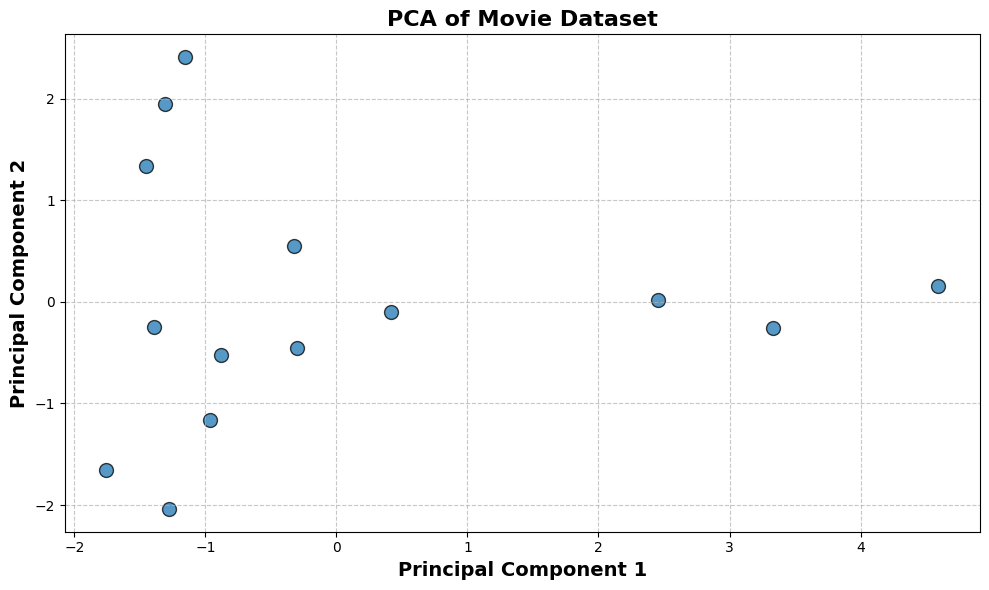

In [123]:
# PCA with 2 components
pca = PCA(n_components=2)
X_pcas = pca.fit_transform(X)

# Linear regression model
model = LinearRegression()
model.fit(X_pcas, Y)

# Plotting the PCA results without colormap
plt.figure(figsize=(10, 6))

# Simple scatter plot without color mapping, using Y for determining the trend later
plt.scatter(X_pcas[:, 0], X_pcas[:, 1], edgecolor='k', s=100, alpha=0.75)

# Customize axis labels and title
plt.xlabel('Principal Component 1', fontsize=14, weight='bold')
plt.ylabel('Principal Component 2', fontsize=14, weight='bold')
plt.title('PCA of Movie Dataset', fontsize=16, weight='bold')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set major ticks for better readability
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()